# CONSERVATION AND VARIATION ANALYSIS

In [13]:
import variant_analysis
import structural_analysis
import pandas as pd
import numpy as np
import importlib

In [91]:
aln_in = "/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/anks_final_aln.sto"
aln_fmt = "stockholm"
variant_table = pd.read_pickle("/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.varalign/aligned_variants_data/anks_final_aln.sto_variants.p.gz")

## CONSERVATION AND OCCUPANCY ANALYSIS

In [93]:
cons_cols = structural_analysis.get_cons_cols(aln_in, aln_fmt, t = 0.45)
shenkin_aln = variant_analysis.calculate_shenkin(aln_in, aln_fmt)
shenkin_aln_filt = shenkin_aln[shenkin_aln.occ_pct > 0.45]
shenkin_aln_filt.index = range(1, len(shenkin_aln_filt)+1)
q1 = np.percentile(shenkin_aln_filt.relative_shenkin, 25)
q3 = np.percentile(shenkin_aln_filt.relative_shenkin, 75)
print(q1, q3)

39.09809836293599 86.82008057676458


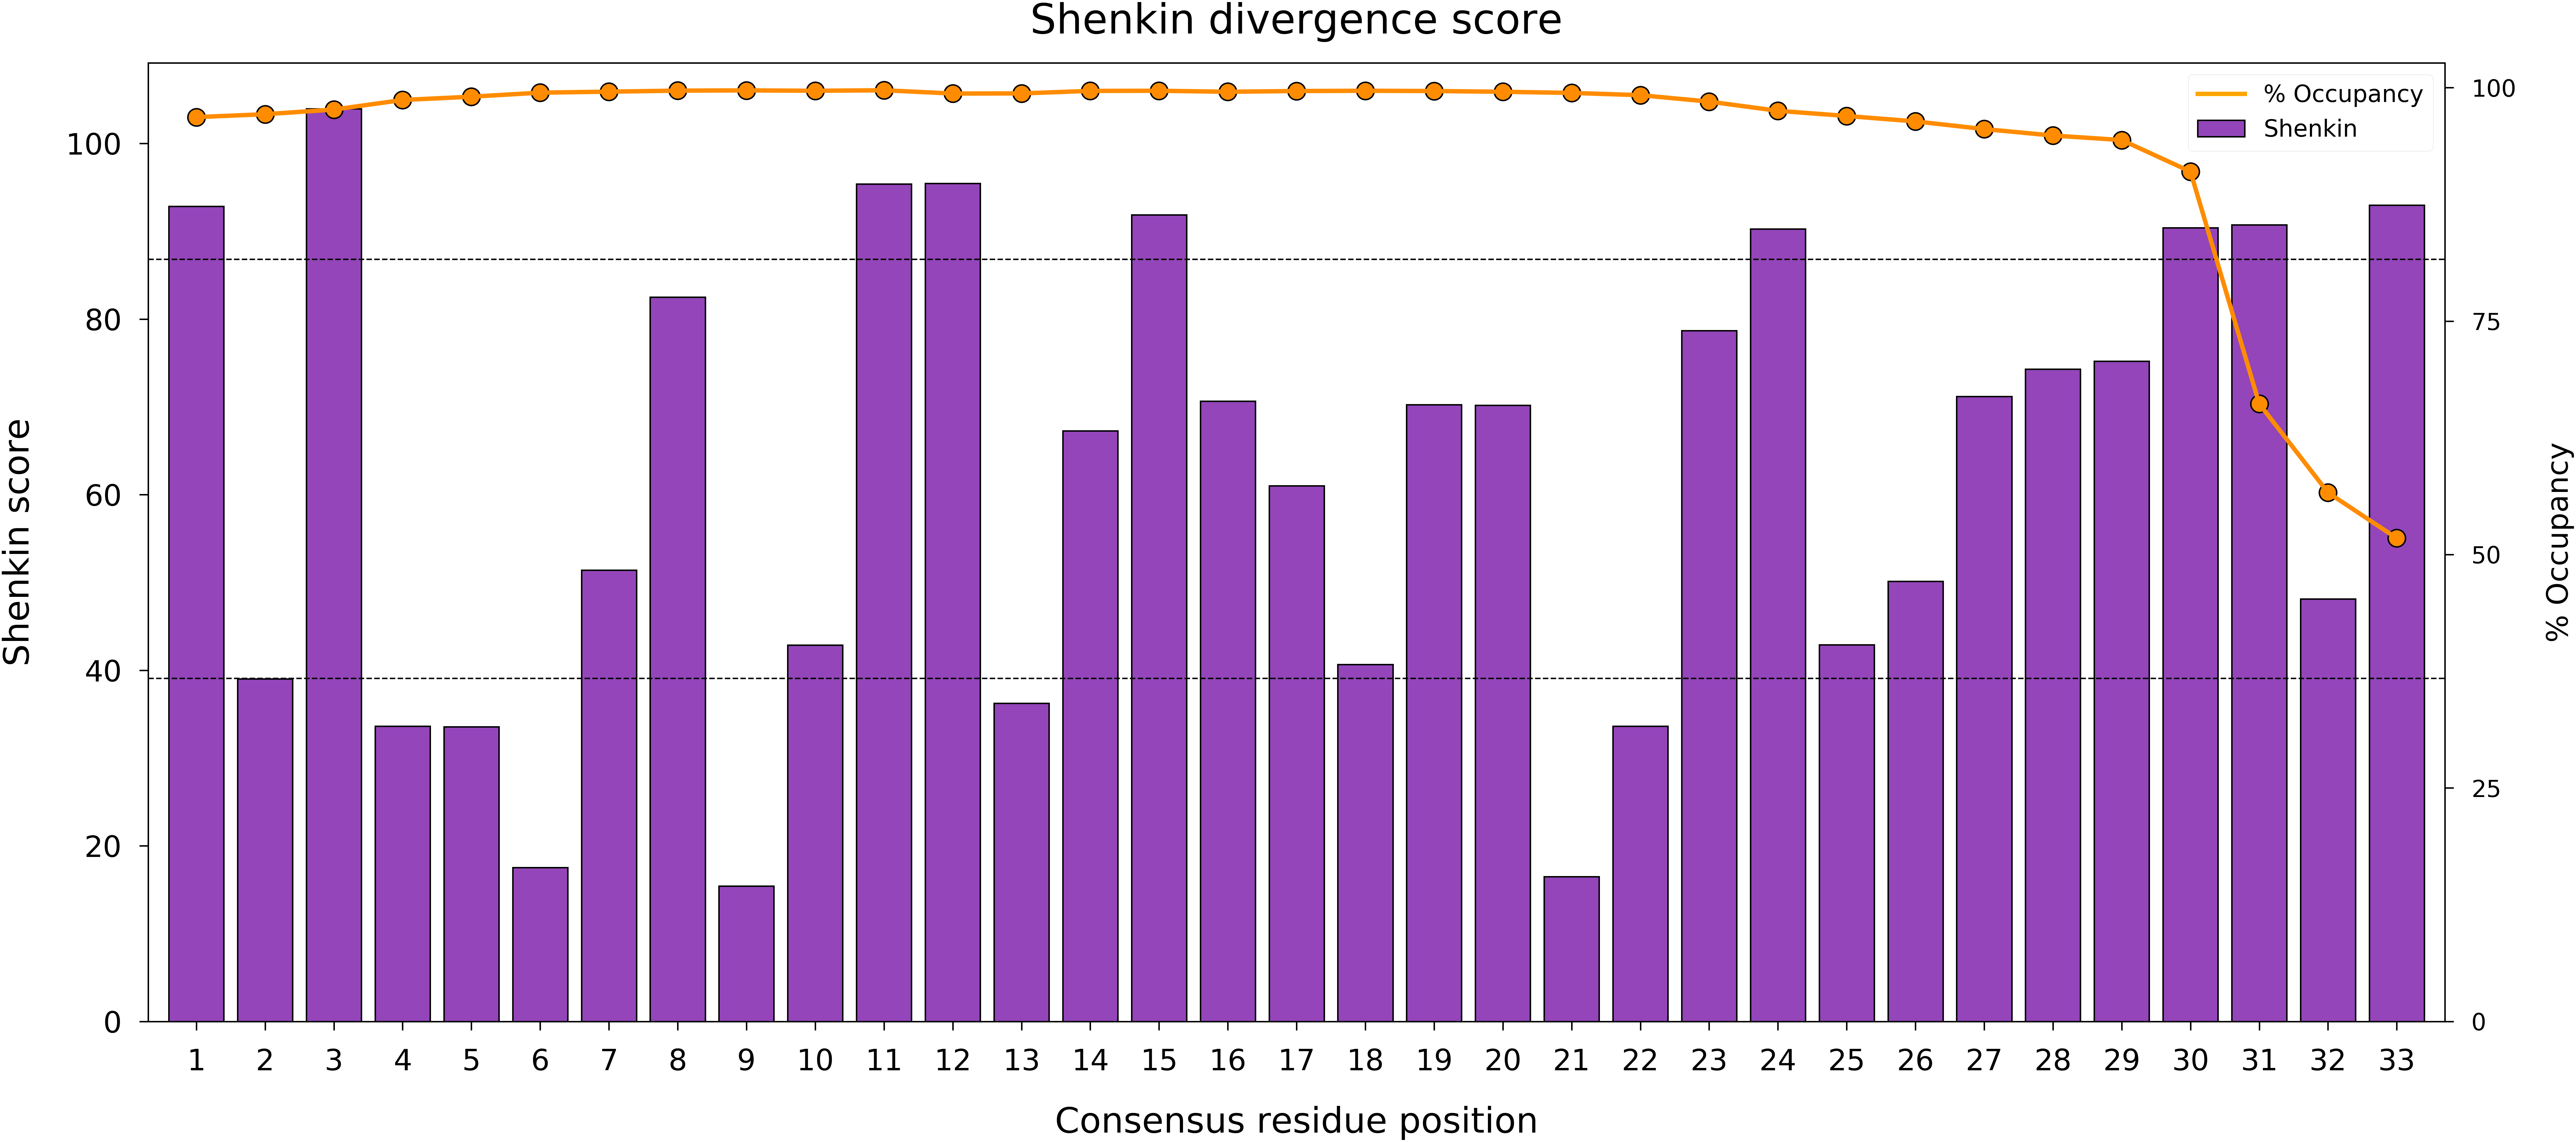

In [94]:
qs = [q1, q3]
variant_analysis.plot_cons_occ(shenkin_aln_filt, qs, colors = ["darkorchid", "darkorange"], cons_score_col = 'shenkin', cons_score_label = "Shenkin score", out = None)

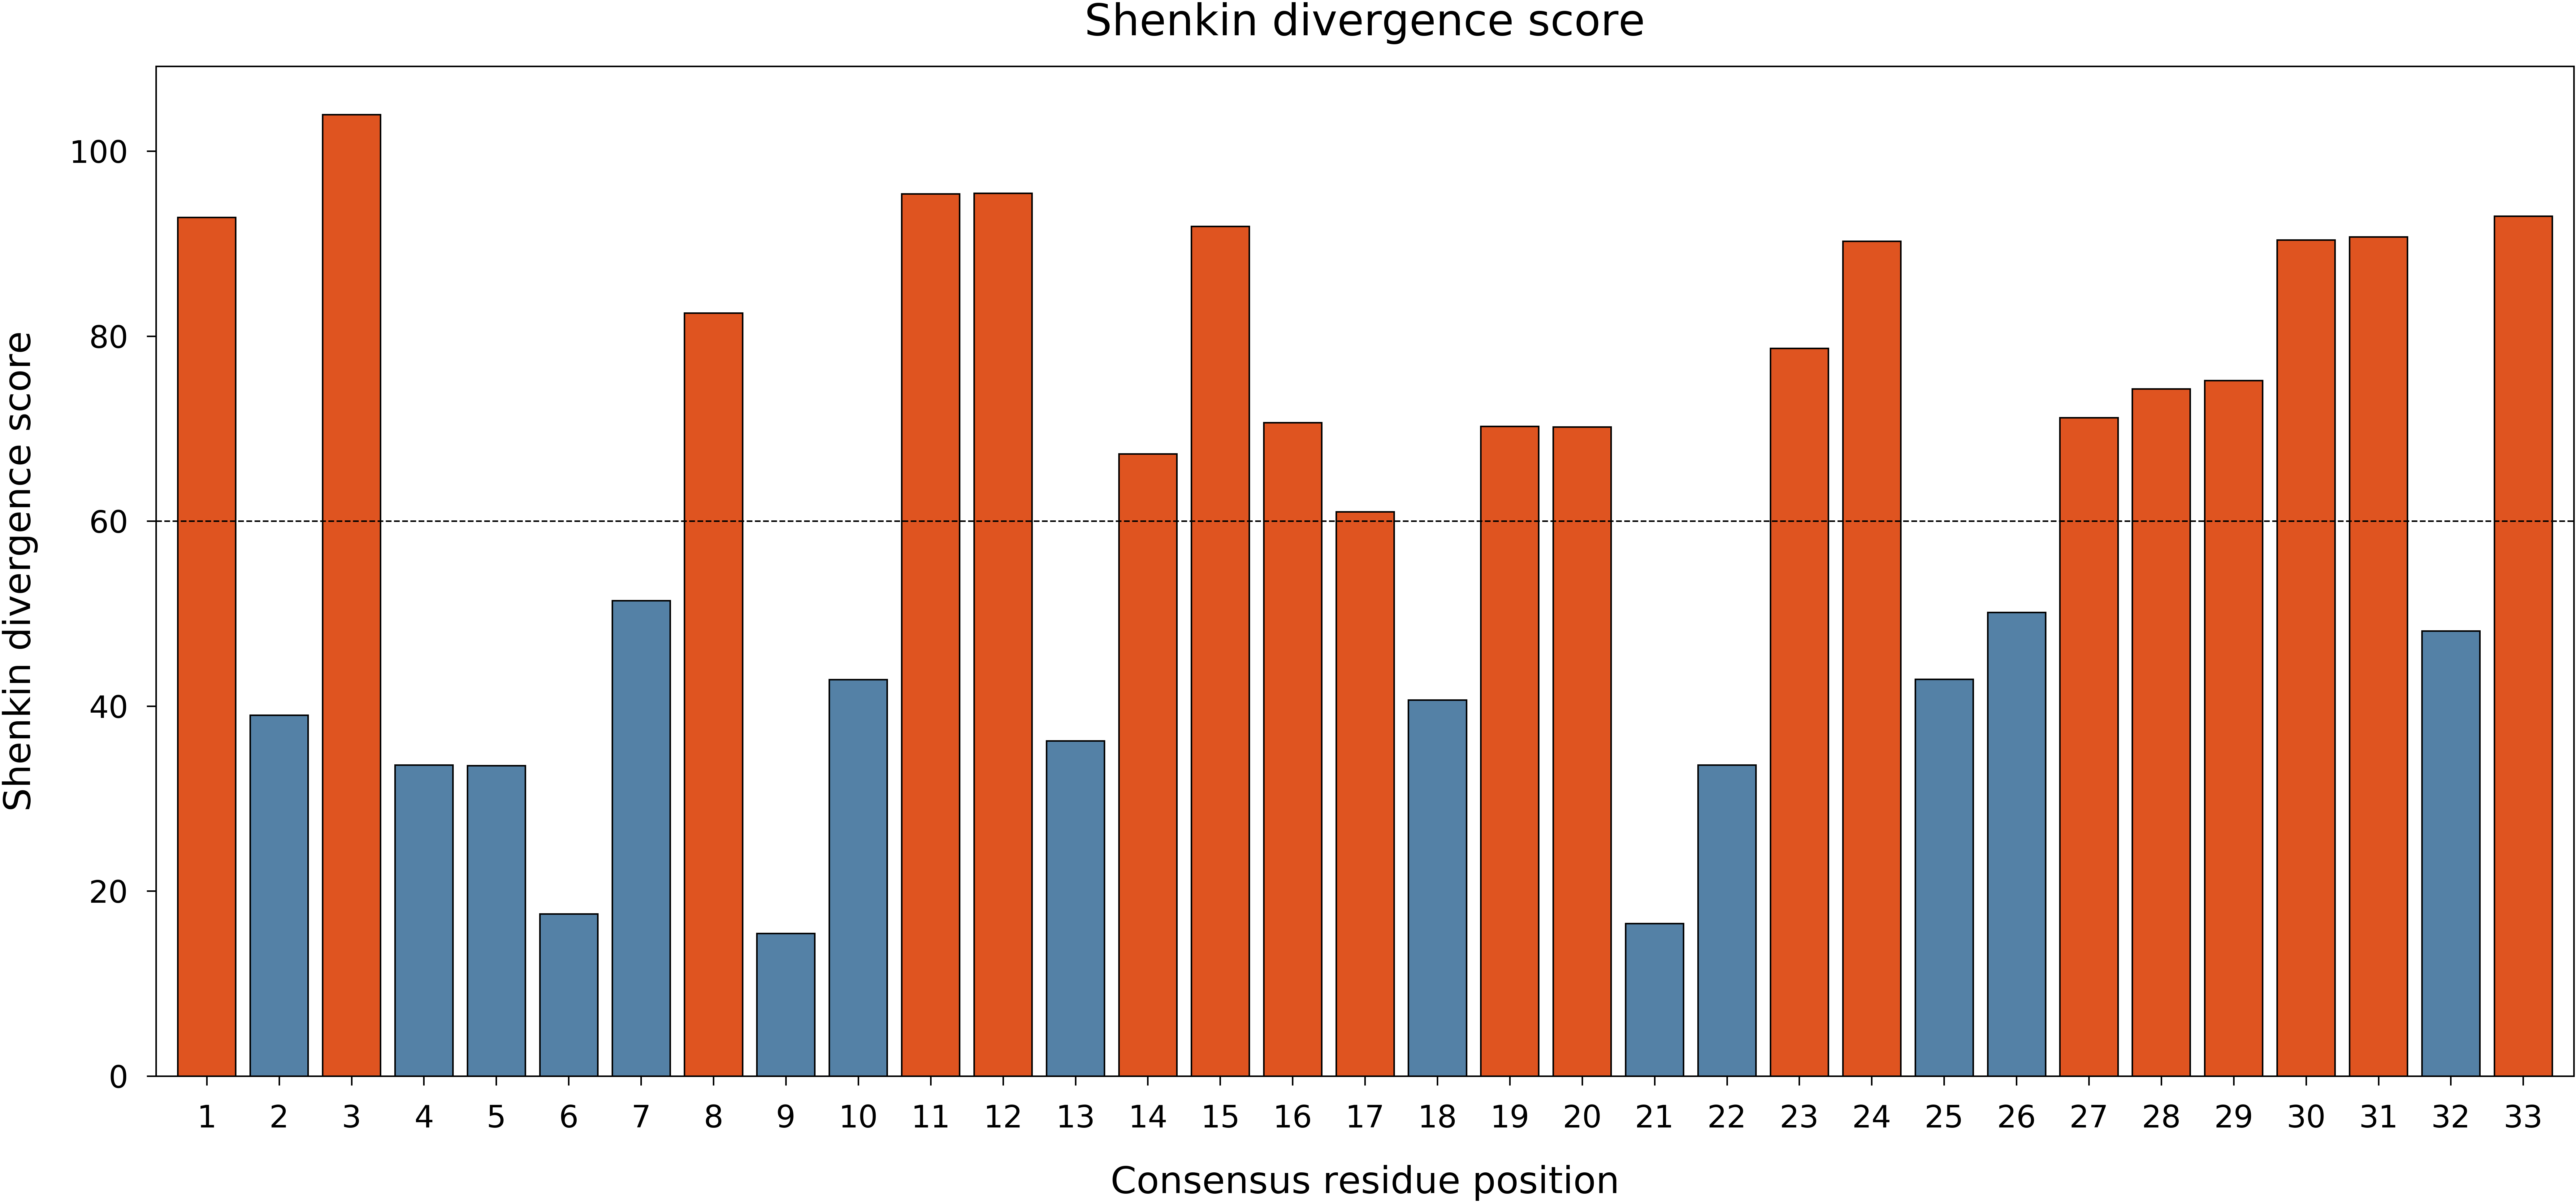

In [95]:
variant_analysis.plot_conservation(shenkin_aln_filt, cons_score_col = 'shenkin', cons_score_label = "Shenkin divergence score", out = None)

## MISSENSE VARIANTS ANALYSIS

In [96]:
human_missense_variants = variant_analysis.format_variant_table(variant_table, cons_cols)

35746
1435
missense_variant                                              21338
synonymous_variant                                            11790
missense_variant&splice_region_variant                          780
frameshift_variant                                              653
stop_gained                                                     632
splice_region_variant&synonymous_variant                        376
inframe_insertion                                                47
inframe_deletion                                                 42
frameshift_variant&splice_region_variant                         28
stop_gained&splice_region_variant                                25
stop_gained&frameshift_variant                                   16
protein_altering_variant                                          5
stop_gained&inframe_insertion                                     2
stop_gained&frameshift_variant&splice_region_variant              2
start_lost                           

In [97]:
aln_out_human_missense_variants = "/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/anks_final_aln_human_missense_variants_seqs.sto"
missense_variants_df = variant_analysis.get_missense_df(aln_in, aln_fmt, human_missense_variants, aln_out_human_missense_variants, t = 0.5, cons_occ_plot = False)

In [98]:
missense_variants_df

,col,shenkin,occ,gaps,occ_pct,gaps_pct,relative_shenkin,variants,oddsratio,log_oddsratio,pvalue,ci_dist
1,38,96.107804,1401,32,0.977669,0.022331,96.039286,627,0.962035,-0.038705,4.381705e-01,0.095627
2,39,32.527803,1404,29,0.979763,0.020237,32.504613,667,1.023155,0.022891,6.314976e-01,0.093657
3,40,100.071344,1410,23,0.983950,0.016050,100.000000,587,0.892980,-0.113191,2.318448e-02,0.097694
4,41,25.869004,1426,7,0.995115,0.004885,25.850561,703,1.063086,0.061176,1.930697e-01,0.091841
5,42,26.018221,1430,3,0.997906,0.002094,25.999672,751,1.135069,0.126693,6.189692e-03,0.089880
6,43,14.024392,1433,0,1.000000,0.000000,14.014393,455,0.676347,-0.391050,1.728372e-13,0.106761
7,44,39.966733,1433,0,1.000000,0.000000,39.938239,596,0.892044,-0.114239,2.135478e-02,0.096962
8,45,75.744889,1433,0,1.000000,0.000000,75.690888,617,0.924424,-0.078584,1.116316e-01,0.095825
9,46,11.722049,1433,0,1.000000,0.000000,11.713692,639,0.958417,-0.042472,3.880441e-01,0.094701
10,59,36.885923,1433,0,1.000000,0.000000,36.859625,653,0.980087,-0.020114,6.845640e-01,0.094019


In [99]:
missense_variants_df = variant_analysis.add_miss_class(missense_variants_df)

In [100]:
variant_analysis.plot_shenkin_logOR(missense_variants_df, "miss_class", "miss_color")

## DISTRIBUTION OF SPLICE REGION VARIANTS ALONG THE ANK

35746
1435
missense_variant                                              21338
synonymous_variant                                            11790
missense_variant&splice_region_variant                          780
frameshift_variant                                              653
stop_gained                                                     632
splice_region_variant&synonymous_variant                        376
inframe_insertion                                                47
inframe_deletion                                                 42
frameshift_variant&splice_region_variant                         28
stop_gained&splice_region_variant                                25
stop_gained&frameshift_variant                                   16
protein_altering_variant                                          5
stop_gained&inframe_insertion                                     2
stop_gained&frameshift_variant&splice_region_variant              2
start_lost                           

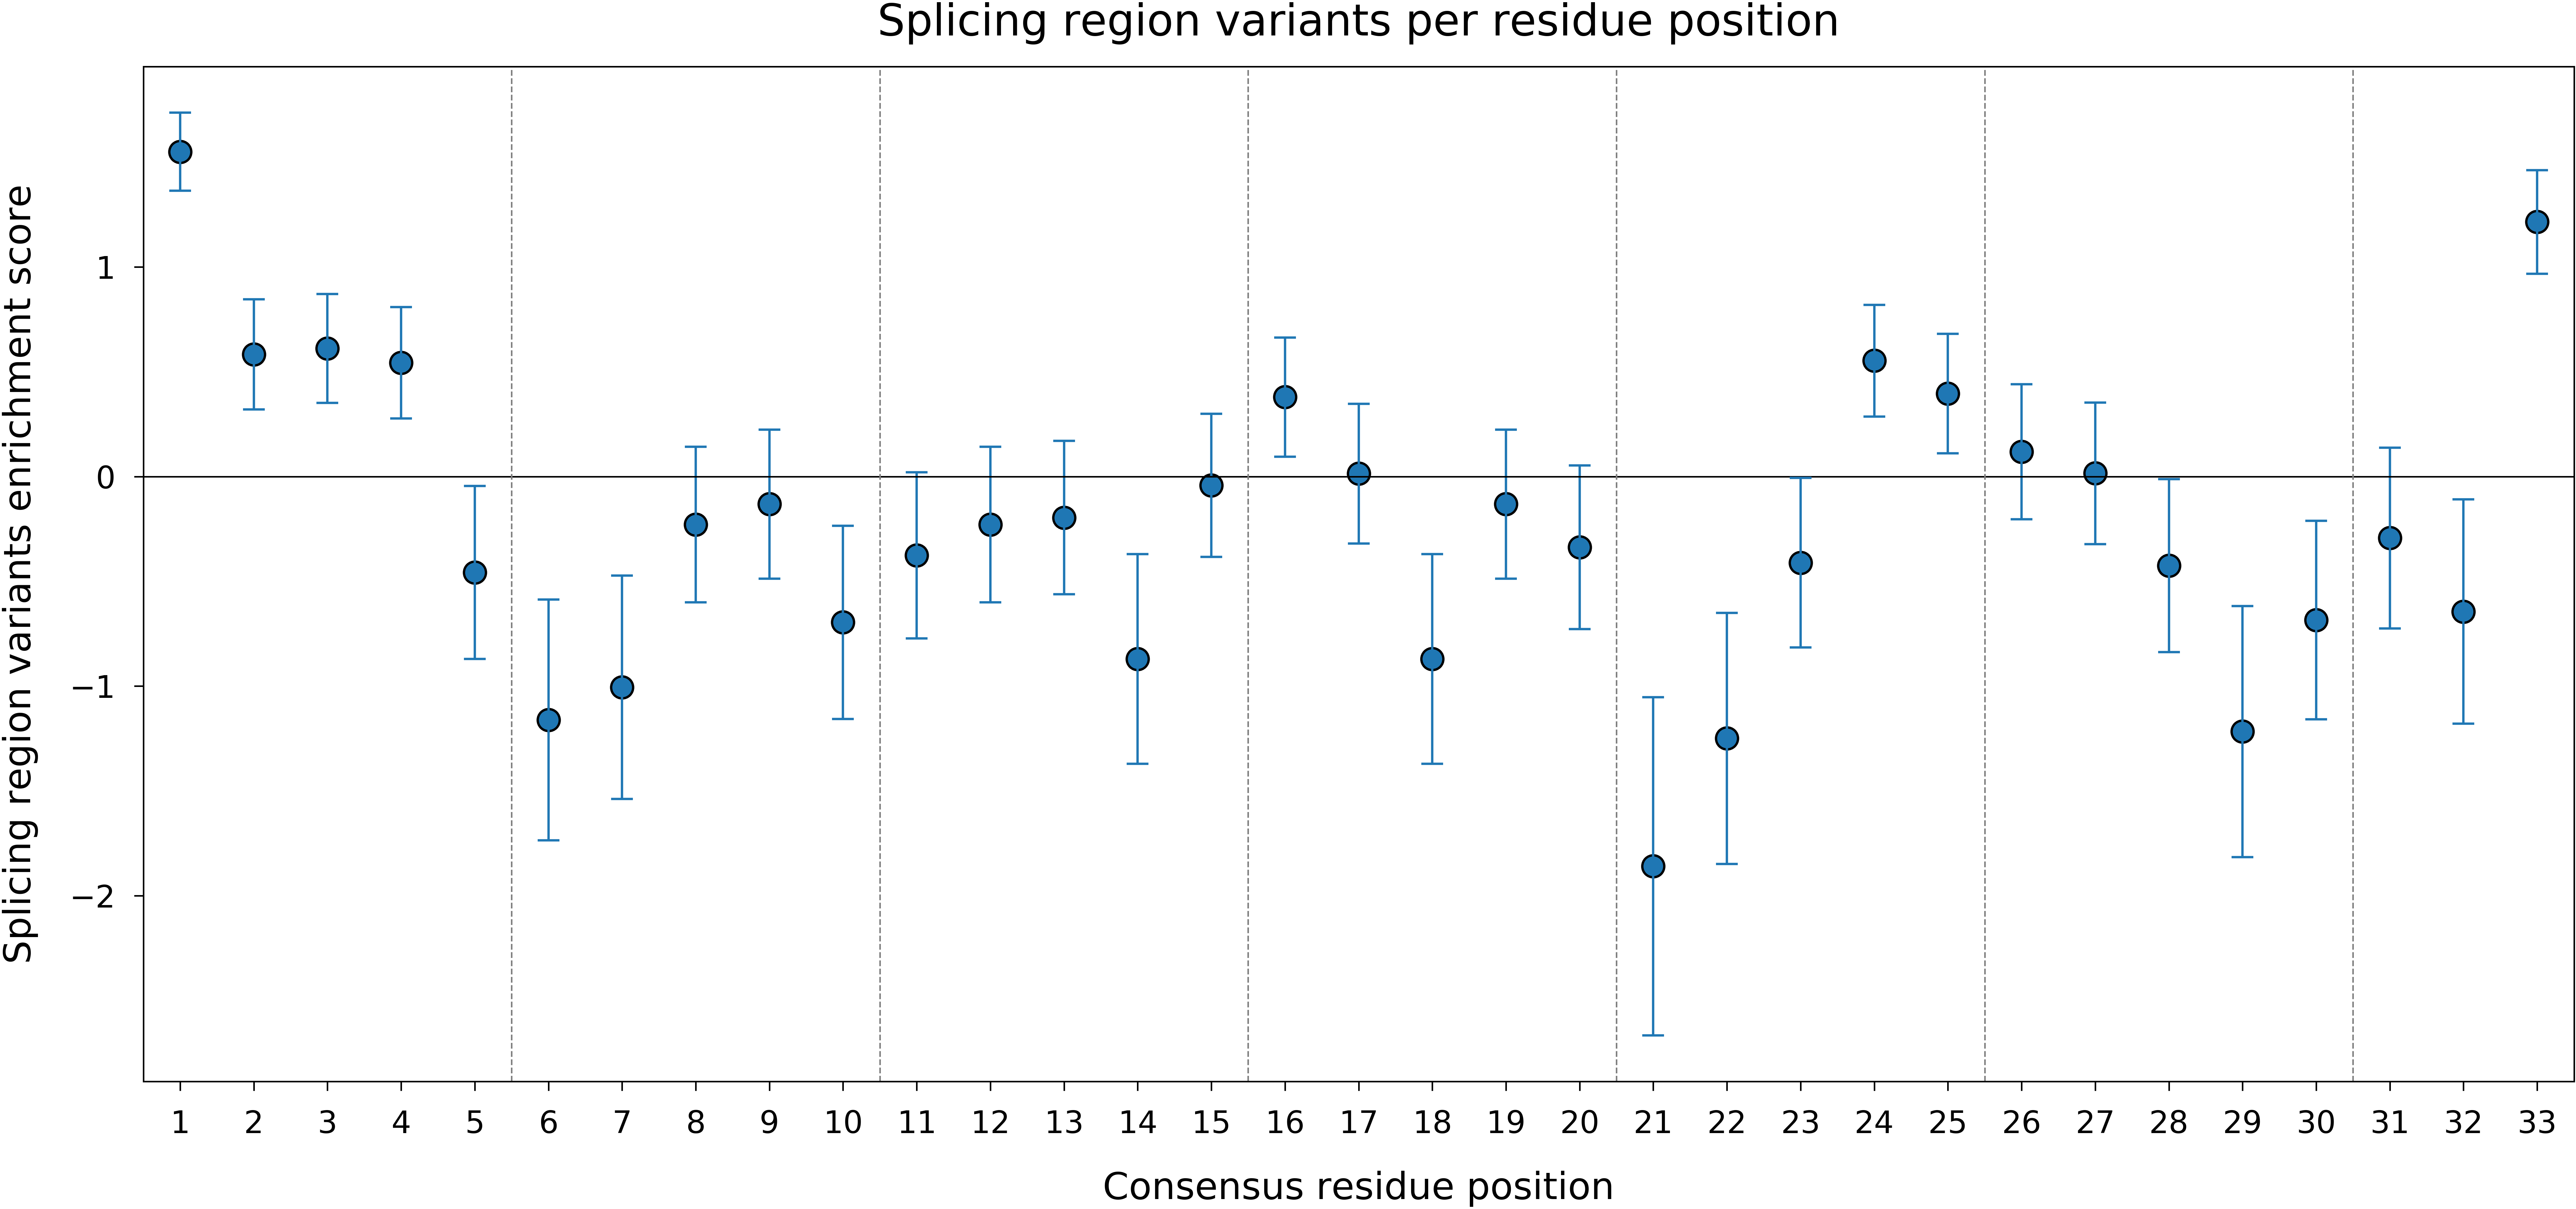

In [101]:
vep_mask = ['stop_gained&splice_region_variant', 'missense_variant&splice_region_variant', 'splice_region_variant&synonymous_variant',
            'frameshift_variant&splice_region_variant', 'stop_gained&frameshift_variant&splice_region_variant',
            'inframe_insertion&splice_region_variant', 'stop_gained&protein_altering_variant&splice_region_variant',
            'inframe_deletion&splice_region_variant']

human_splice_variants = variant_analysis.format_variant_table(variant_table, cons_cols, vep_mask)
aln_out_human_splice_variants = '/cluster/gjb_lab/2394007/varalign_runs/varalign_allsp_chained_1core/unaln2aln_chained_rf_human_splice_variants_seqs.sto'
splice_variants_df = variant_analysis.get_missense_df(aln_in, aln_fmt, human_splice_variants, aln_out_human_splice_variants, t = 0.45, cons_occ_plot = False)
variant_analysis.plot_variants_enrichment(splice_variants_df)